In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plot
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler as Zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as DataSplit
from sklearn.multiclass import OneVsRestClassifier

from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.naive_bayes import GaussianNB as NB
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

from keras.utils import np_utils
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# 1. Data load

In [2]:
data = pd.read_csv("../input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.shape

(150, 6)

In [5]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
data["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Encoding

In [7]:
# iris = data
encoder = LabelEncoder()
Y = data.Species
encoded_Y = encoder.fit_transform(Y)

y = np_utils.to_categorical(encoded_Y)
y = pd.DataFrame(data=y, columns=['Iris-setosa','Iris-versicolor','Iris-virginica'])

y1 = y.head(3)
y2 = y.tail(3)
conc_y = pd.concat([y1, y2],axis = 0, ignore_index=True)
conc_y

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0


# Data split

In [8]:
X = data.drop(['Id'], axis=1)

X_train, X_test, y_train, y_test = DataSplit(X,y,test_size=0.33)
Trainset = pd.concat([X_train, y_train],axis = 1)
Testset = pd.concat([X_test, y_test],axis = 1)

In [9]:
iris = Trainset.drop(['Iris-setosa','Iris-versicolor','Iris-virginica'], axis=1)
X_train = X_train.drop(['Species'], axis=1)
X_test = X_test.drop(['Species'], axis=1)

In [10]:
iris.head(10) # Training set

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5.0,3.6,1.4,0.2,Iris-setosa
110,6.5,3.2,5.1,2.0,Iris-virginica
20,5.4,3.4,1.7,0.2,Iris-setosa
27,5.2,3.5,1.5,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
11,4.8,3.4,1.6,0.2,Iris-setosa
31,5.4,3.4,1.5,0.4,Iris-setosa
88,5.6,3.0,4.1,1.3,Iris-versicolor
3,4.6,3.1,1.5,0.2,Iris-setosa
139,6.9,3.1,5.4,2.1,Iris-virginica


In [11]:
iris_test = Testset.drop(['Iris-setosa','Iris-versicolor','Iris-virginica'], axis=1)
iris_test.to_csv('testset.csv',index=False)
iris_test.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
109,7.2,3.6,6.1,2.5,Iris-virginica
95,5.7,3.0,4.2,1.2,Iris-versicolor
36,5.5,3.5,1.3,0.2,Iris-setosa
79,5.7,2.6,3.5,1.0,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
7,5.0,3.4,1.5,0.2,Iris-setosa
82,5.8,2.7,3.9,1.2,Iris-versicolor
9,4.9,3.1,1.5,0.1,Iris-setosa
87,6.3,2.3,4.4,1.3,Iris-versicolor


# 2. Data analysis

**This section analyze the training dataset.**  **Testset should be unseen data**

In [12]:
iris["SepalLengthCm"].describe() # Describe a variable 

count    100.000000
mean       5.778000
std        0.837092
min        4.300000
25%        5.100000
50%        5.650000
75%        6.400000
max        7.900000
Name: SepalLengthCm, dtype: float64

In [13]:
iris.Species.value_counts() # Counts 

Iris-setosa        37
Iris-virginica     35
Iris-versicolor    28
Name: Species, dtype: int64

# 2. Data analysis - (1) Histogram

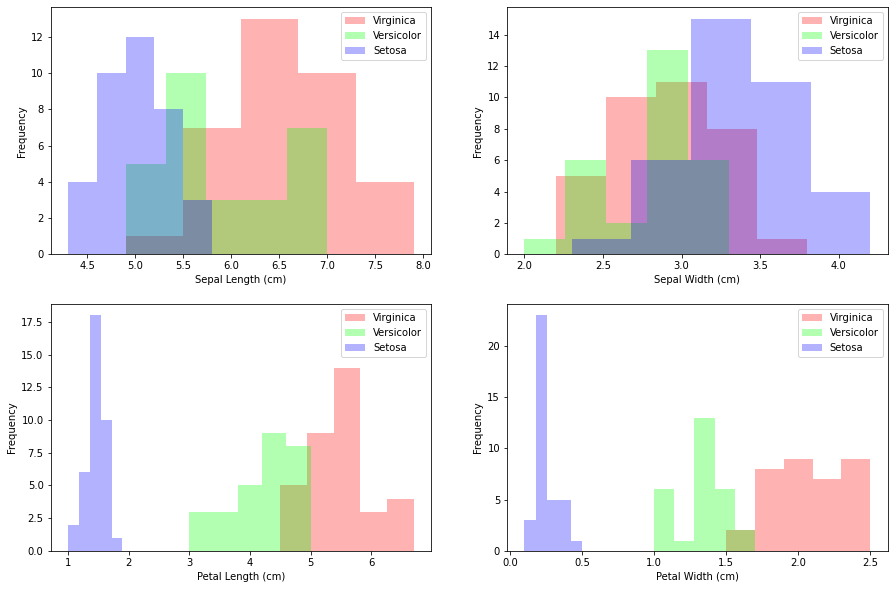

<Figure size 432x288 with 0 Axes>

In [14]:
plot.figure(figsize=(15,10))

plot.subplot(2,2,1)
vir = plot.hist(iris[iris["Species"] == "Iris-virginica"].SepalLengthCm, bins=5, fc=(1,0,0,0.3), label="Virginica")
ver = plot.hist(iris[iris["Species"] == "Iris-versicolor"].SepalLengthCm, bins=5, fc=(0,1,0,0.3), label="Versicolor")
vir = plot.hist(iris[iris["Species"] == "Iris-setosa"].SepalLengthCm, bins=5, fc=(0,0,1,0.3), label="Setosa")
plot.legend()
plot.xlabel("Sepal Length (cm)")
plot.ylabel("Frequency")

plot.subplot(2,2,2)
vir = plot.hist(iris[iris["Species"] == "Iris-virginica"].SepalWidthCm, bins=5, fc=(1,0,0,0.3), label="Virginica")
ver = plot.hist(iris[iris["Species"] == "Iris-versicolor"].SepalWidthCm, bins=5, fc=(0,1,0,0.3), label="Versicolor")
vir = plot.hist(iris[iris["Species"] == "Iris-setosa"].SepalWidthCm, bins=5, fc=(0,0,1,0.3), label="Setosa")
plot.legend()
plot.xlabel("Sepal Width (cm)")
plot.ylabel("Frequency")

plot.subplot(2,2,3)
vir = plot.hist(iris[iris["Species"] == "Iris-virginica"].PetalLengthCm, bins=5, fc=(1,0,0,0.3), label="Virginica")
ver = plot.hist(iris[iris["Species"] == "Iris-versicolor"].PetalLengthCm, bins=5, fc=(0,1,0,0.3), label="Versicolor")
vir = plot.hist(iris[iris["Species"] == "Iris-setosa"].PetalLengthCm, bins=5, fc=(0,0,1,0.3), label="Setosa")
plot.legend()
plot.xlabel("Petal Length (cm)")
plot.ylabel("Frequency")

plot.subplot(2,2,4)
vir = plot.hist(iris[iris["Species"] == "Iris-virginica"].PetalWidthCm, bins=5, fc=(1,0,0,0.3), label="Virginica")
ver = plot.hist(iris[iris["Species"] == "Iris-versicolor"].PetalWidthCm, bins=5, fc=(0,1,0,0.3), label="Versicolor")
vir = plot.hist(iris[iris["Species"] == "Iris-setosa"].PetalWidthCm, bins=5, fc=(0,0,1,0.3), label="Setosa")
plot.legend()
plot.xlabel("Petal Width (cm)")
plot.ylabel("Frequency")

plot.show()
plot.savefig('histogram.png')

# 2. Data analysis - (2) Scatter plot

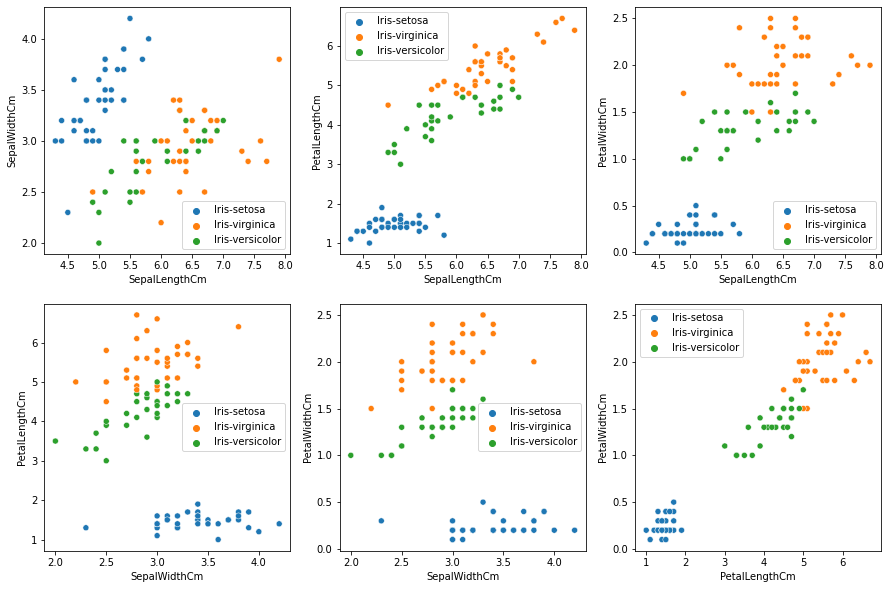

<Figure size 432x288 with 0 Axes>

In [15]:
plot.figure(figsize=(15,10))

plot.subplot(2,3,1)
sns.scatterplot(x = iris.SepalLengthCm, y=iris.SepalWidthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("SepalLengthCm")
plot.ylabel("SepalWidthCm")

plot.subplot(2,3,2)
sns.scatterplot(x = iris.SepalLengthCm, y=iris.PetalLengthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("SepalLengthCm")
plot.ylabel("PetalLengthCm")

plot.subplot(2,3,3)
sns.scatterplot(x = iris.SepalLengthCm, y=iris.PetalWidthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("SepalLengthCm")
plot.ylabel("PetalWidthCm")

plot.subplot(2,3,4)
sns.scatterplot(x = iris.SepalWidthCm, y=iris.PetalLengthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("SepalWidthCm")
plot.ylabel("PetalLengthCm")

plot.subplot(2,3,5)
sns.scatterplot(x = iris.SepalWidthCm, y=iris.PetalWidthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("SepalWidthCm")
plot.ylabel("PetalWidthCm")

plot.subplot(2,3,6)
sns.scatterplot(x = iris.PetalLengthCm, y=iris.PetalWidthCm, hue = "Species", data = iris)
plot.legend()
plot.xlabel("PetalLengthCm")
plot.ylabel("PetalWidthCm")
plot.show()
plot.savefig('scatter.png')


# 2. Data analysis - (3) Box plot

In [16]:
print(iris)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
4              5.0           3.6            1.4           0.2      Iris-setosa
110            6.5           3.2            5.1           2.0   Iris-virginica
20             5.4           3.4            1.7           0.2      Iris-setosa
27             5.2           3.5            1.5           0.2      Iris-setosa
38             4.4           3.0            1.3           0.2      Iris-setosa
..             ...           ...            ...           ...              ...
61             5.9           3.0            4.2           1.5  Iris-versicolor
26             5.0           3.4            1.6           0.4      Iris-setosa
47             4.6           3.2            1.4           0.2      Iris-setosa
75             6.6           3.0            4.4           1.4  Iris-versicolor
0              5.1           3.5            1.4           0.2      Iris-setosa

[100 rows x 5 columns]


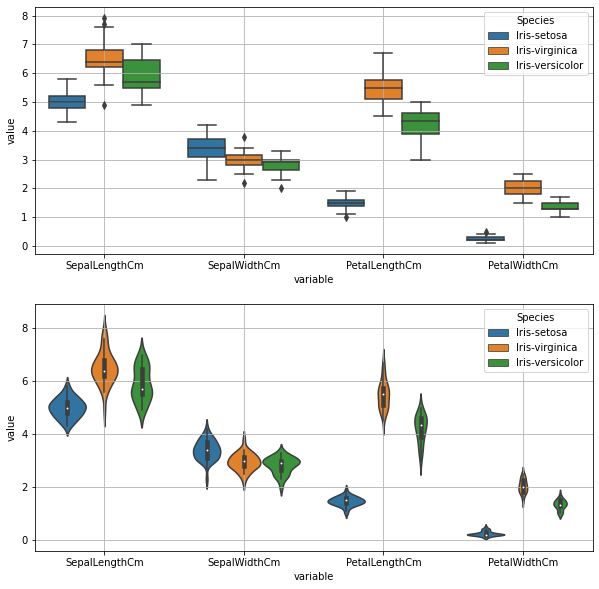

<Figure size 432x288 with 0 Axes>

In [17]:
plot.figure(figsize=(10,10))

plot.subplot(2,1,1)
melted_iris = pd.melt(iris, id_vars = "Species", value_vars = list(iris.columns[0:4]))
sns.boxplot(x = "variable", y="value", hue = "Species", data = melted_iris)
plot.grid()

plot.subplot(2,1,2)
melted_iris = pd.melt(iris, id_vars = "Species", value_vars = list(iris.columns[0:4]))
sns.violinplot(x = "variable", y="value", hue = "Species", data = melted_iris)
plot.grid()
plot.show()
plot.savefig('Boxplot.png')

# 2. Data analysis - (4) Pairplot

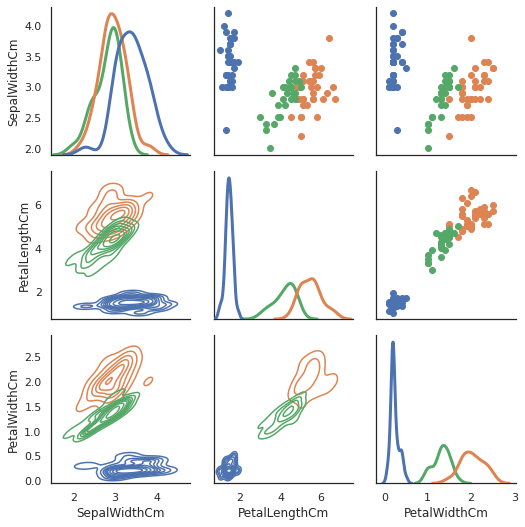

In [18]:
# sns.pairplot(iris.drop("Id", axis=1), hue = "Species", size = 3) # Simple version

sns.set(style = "white")
df = iris.loc[:,list(iris.columns[1:6])]
g = sns.PairGrid(df,diag_sharey = False, hue="Species", data=iris)
g.map_lower(sns.kdeplot, camp="Blues_d")
g.map_upper(plot.scatter)
g.map_diag(sns.kdeplot, lw = 3)
plot.savefig('Pairplot.png')
plot.show()

# 2. Data analysis - (5) Pearson's correlation

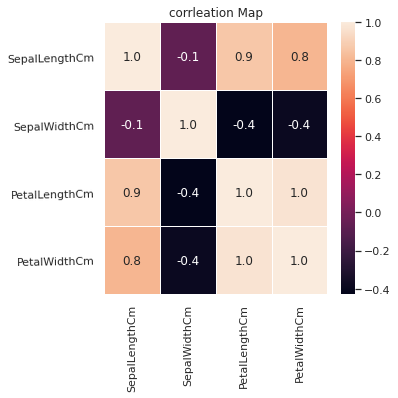

In [19]:
f, ax = plot.subplots(figsize = (5,5))
sns.heatmap(iris.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.yticks(rotation = 1)
plot.title('corrleation Map')
plot.savefig('heatmap_Pearson.png')
plot.show()

# 2. Data analysis - (6) Spearman's rank correlation

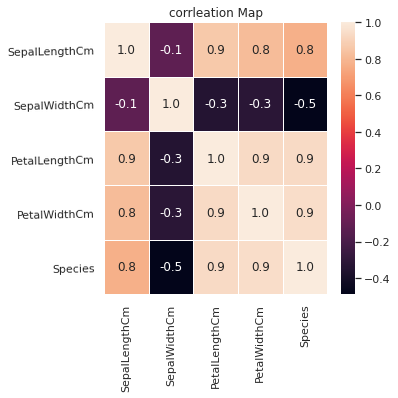

In [20]:
ranked_data = iris.rank()
f, ax = plot.subplots(figsize = (5,5))
sns.heatmap(ranked_data.corr(), annot = True, linewidth = 0.5, fmt = ".1f", ax = ax)
plot.xticks(rotation = 90)
plot.yticks(rotation = 1)
plot.title('corrleation Map')
plot.savefig('heatmap_Spearman.png')
plot.show()

# 3. Missing data

In [21]:
total = iris.isnull().sum().sort_values(ascending=False)
percent = (iris.isnull().sum()/iris.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total','Percent'])
missing_data.head()

,Total,Percent
SepalLengthCm,0,0.0
SepalWidthCm,0,0.0
PetalLengthCm,0,0.0
PetalWidthCm,0,0.0
Species,0,0.0


In [22]:
# # Dealing with missing data (Not used in this article)
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
# df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
# df_train.isnull().sum().max() #just checking that there's no missing data missing...

# 4. Train the models

In [23]:
def train_and_test(model):
    model = OneVsRestClassifier(model).fit(X_train,y_train)
    prediction = model.predict(X_test)
    accuracy = round(accuracy_score(prediction,y_test)*100, 2) # .2f
    print("Model:",model," Training_accuracy: ", accuracy, "%")
    return accuracy


# Logistic regression
LR_pred = train_and_test(LR())

# SVM
SVM_pred = train_and_test(SVM())

# KNN
KNN_pred = train_and_test(KNN(n_neighbors = 4))

# Random forest
RF_pred = train_and_test(RF(n_estimators=100))

# Naive Bayes
NB_pred = train_and_test(NB())



Model: OneVsRestClassifier(estimator=LogisticRegression())  Training_accuracy:  64.0 %
Model: OneVsRestClassifier(estimator=SVC())  Training_accuracy:  96.0 %
Model: OneVsRestClassifier(estimator=KNeighborsClassifier(n_neighbors=4))  Training_accuracy:  92.0 %
Model: OneVsRestClassifier(estimator=RandomForestClassifier())  Training_accuracy:  92.0 %
Model: OneVsRestClassifier(estimator=GaussianNB())  Training_accuracy:  88.0 %


In [24]:
# Generate the output to *.csv format
print('The highest accuracy: ',RF_pred," %")

The highest accuracy:  92.0  %
